# Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('customer_churn_large_dataset.xlsx')
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


### Data Cleaning

In [3]:
# checking the null value
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [4]:
# Checking the dupliate value
data.duplicated().sum()

0

In [3]:
## In the above data set the columns ['Name','Customer_ID'] are not necessary so droping that columns
data.drop(['CustomerID','Name'],axis=1,inplace=True)

## EDA

<Axes: >

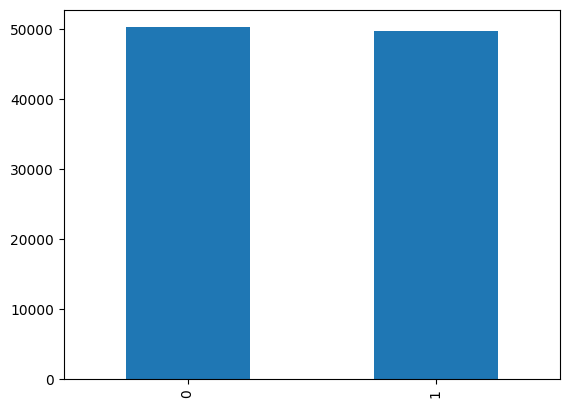

In [15]:
data['Churn'].value_counts().plot(kind='bar')

<ipython-input-6-38ac61bb2034>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

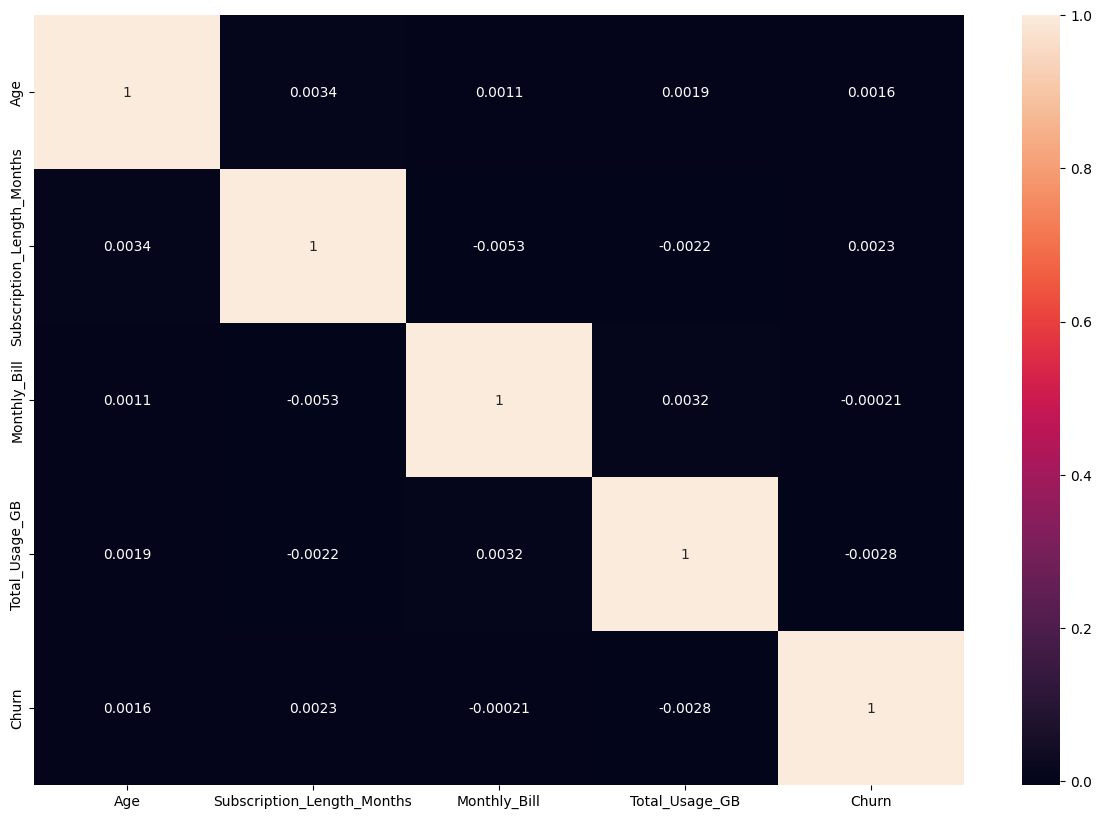

In [6]:
#correleation using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [7]:
# checking the distribution of data and finding the outlier using box plot
import matplotlib.pyplot as plt

def box_and_count(variable):
    plt.figure(figsize=(20, 6))
    plt.subplot(1,2,1)
    sns.countplot(x=data[variable],hue=data['Churn'])
    plt.subplot(1,2,2)
    sns.boxplot(x=data[variable])
    plt.show()


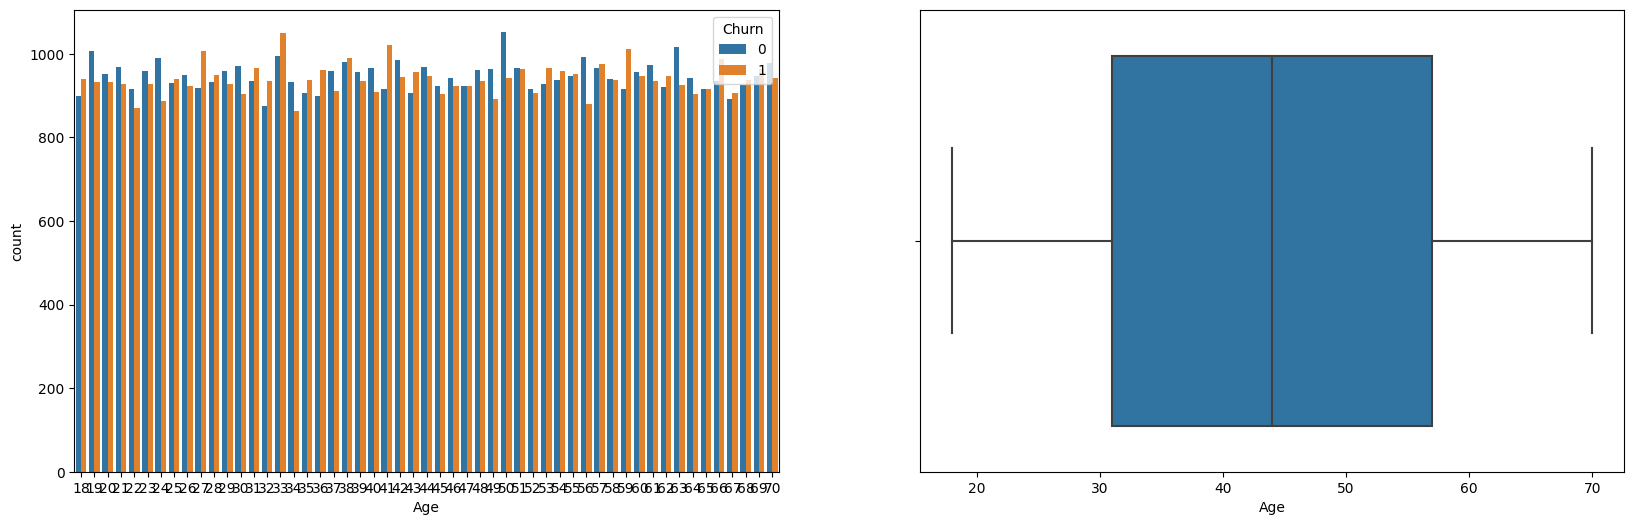

In [8]:
box_and_count('Age')

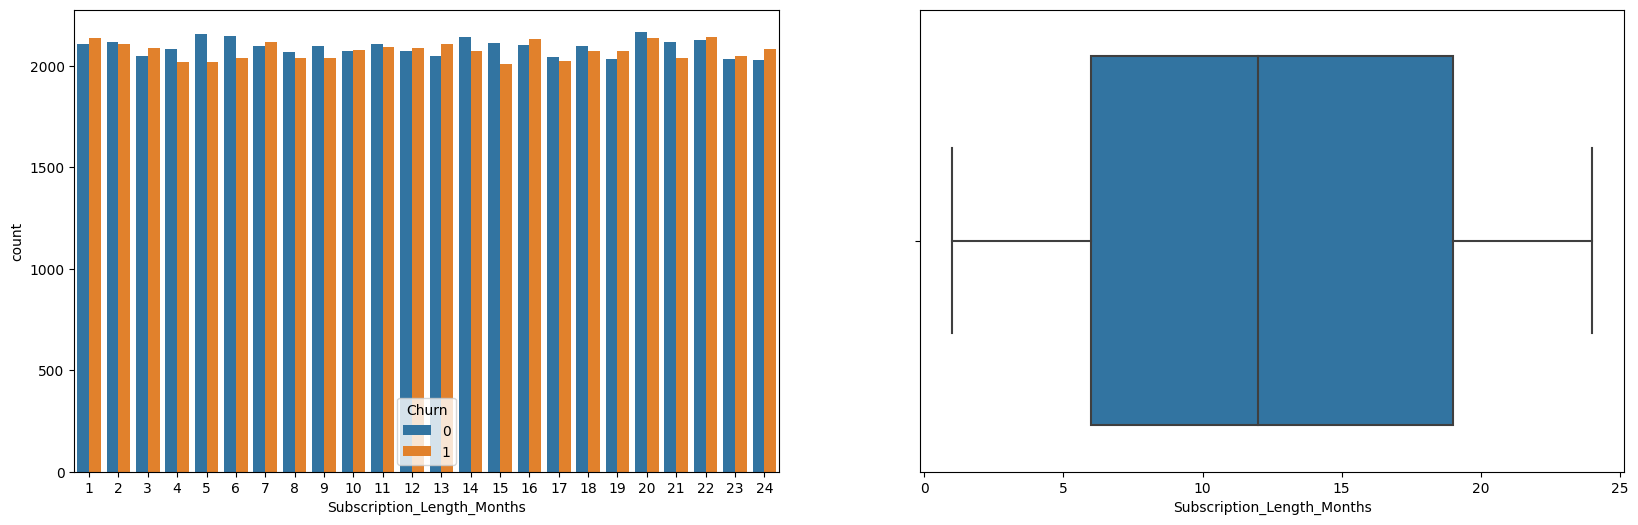

In [9]:
box_and_count('Subscription_Length_Months')

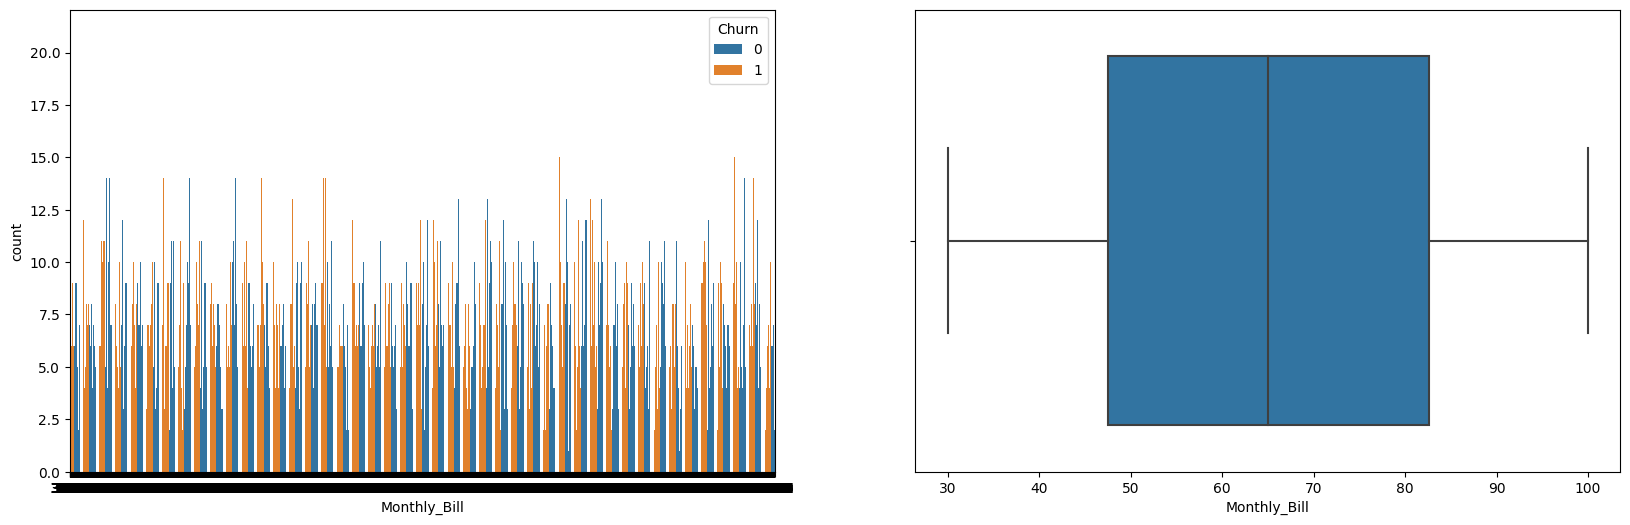

In [10]:
box_and_count('Monthly_Bill')

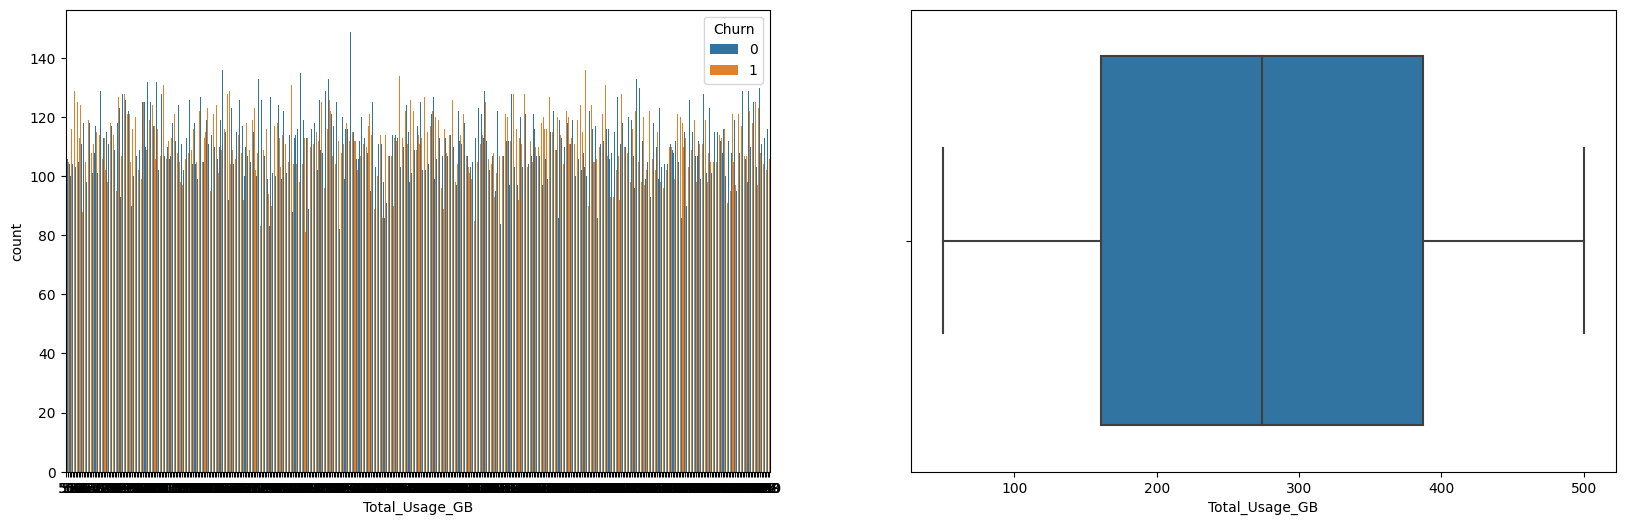

In [11]:
box_and_count('Total_Usage_GB')

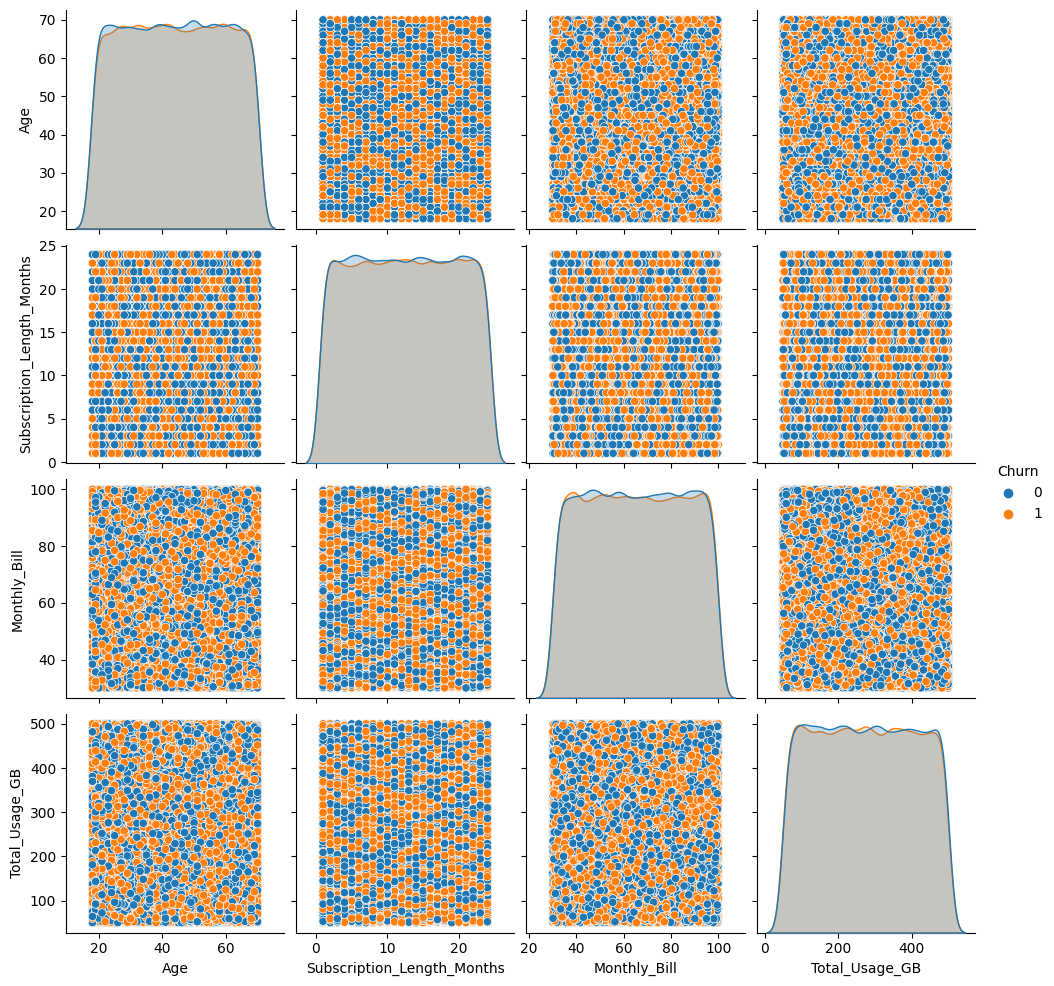

In [12]:
sns.pairplot(data,hue='Churn')


From the above graphs there are no outlier but the distribution of the data are Uniform. The pairplot graph shows the the dataset are non linear so we have to use kernel in svm

## dealing with categorical data

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


In [14]:
data['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [4]:
# There are two categorical columns and these columns are Nominal Category type so i used pd.dummies()
data=pd.get_dummies(data,columns=['Gender','Location'],drop_first=True)
# or
# data.replace({'Location':{'Houston':0,'Los Angeles':1,'Miami':2,'Chicago':3,'New York':4}},inplace=True)
# data.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [17]:
data.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,0,1
2,24,5,85.47,460,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,1,0
4,46,19,58.14,266,0,0,0,0,1,0


## spiliting the data into two category independent and dependent

In [5]:
df=data.sample(frac=0.2)

In [27]:
df.shape

(40000, 10)

In [6]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [8]:
#Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

# Using the Machine Learning Algorithms

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='rbf',C=3)
model.fit(x_train,y_train)

SVC(C=3)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,f1_score,precision_score,recall_score
pred= model.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print("Accuracy:", accuracy)

Accuracy: 0.48


In [20]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,f1_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf','sigmoid','poly'],
    'gamma': ['scale', 'auto',0.1, 1],
}
svm_classifier = SVC()
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters and score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   2.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   1.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   1.4s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   2.1s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   2.1s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   2.2s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   2.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   1.1s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   1.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   1.4s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   1.5s
[CV] END ......................C=0.1, gamma=aut

In [21]:

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,f1_score,precision_score,recall_score
models={
    "Logistic":LogisticRegression(),
    "random forest":RandomForestClassifier(),
    "KNN":KNeighborsClassifier(),
    "gradient boosting":GradientBoostingClassifier(),
    "decision tree":DecisionTreeClassifier(),
    "gnb":GaussianNB(),
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)


    #make predictions
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    #training set performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_roc_auc=roc_auc_score(y_train,y_train_pred)

    #test set performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred)
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_roc_auc=roc_auc_score(y_test,y_test_pred)

    #create a dictionary of model performance
    print(list(models.keys())[i])
    print("model performance on training set")
    print("accuracy:",model_train_accuracy)
    print("f1 score:",model_train_f1)
    print("precision:",model_train_precision)
    print("recall:",model_train_recall)
    print("roc_auc:",model_train_roc_auc)

    print("model performance on test set")
    print("accuracy:",model_test_accuracy)
    print("f1 score:",model_test_f1)
    print("precision:",model_test_precision)
    print("recall:",model_test_recall)
    print("roc_auc:",model_test_roc_auc)

    print("-----------------------------------------------------")

Logistic
model performance on training set
accuracy: 0.5105714285714286
f1 score: 0.3464326592903472
precision: 0.5078299776286354
recall: 0.26288361320208453
roc_auc: 0.5073583322637609
model performance on test set
accuracy: 0.49966666666666665
f1 score: 0.35385277658200603
precision: 0.528957528957529
recall: 0.26584734799482534
roc_auc: 0.5070639766108928
-----------------------------------------------------
random forest
model performance on training set
accuracy: 1.0
f1 score: 1.0
precision: 1.0
recall: 1.0
roc_auc: 1.0
model performance on test set
accuracy: 0.495
f1 score: 0.49144008056394756
precision: 0.5108164689462665
recall: 0.47347994825355755
roc_auc: 0.4956808269465862
-----------------------------------------------------
KNN
model performance on training set
accuracy: 0.6895714285714286
f1 score: 0.6839272727272727
precision: 0.6872259573224203
recall: 0.6806601042269832
roc_auc: 0.6894558276352062
model performance on test set
accuracy: 0.49266666666666664
f1 score: 0

## Using Random Forest Classifier

In [22]:
# hyperparameter tuning
rf_params={"max_depth":[20,25,40],
              "n_estimators":[100,200,300,400,500,1000],
                "min_samples_split":[2,5,10,15,100],
                "min_samples_leaf":[1,2,5,10],
                "criterion":["gini","entropy"]}

randomcv_models=[
    ("random forest",RandomForestClassifier(),rf_params)
    # ("decision_tree",DecisionTreeClassifier(),rf_params)
]
from sklearn.model_selection import RandomizedSearchCV
model_params=[]
for name,model,params in randomcv_models:
    rs=RandomizedSearchCV(model,params,cv=3,n_jobs=-1,verbose=2,n_iter=10,scoring='accuracy')
    rs.fit(x_train,y_train)
    model_params.append({
        "model":name,
        "best_score":rs.best_score_,
        "best_params":rs.best_params_
    })

for model_name in model_params:
    print(f"-------BEST PARMS{model_name}------------------")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
-------BEST PARMS{'model': 'random forest', 'best_score': 0.5014284082448797, 'best_params': {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_depth': 40, 'criterion': 'gini'}}------------------


Got only 50% accuracy

# Bagging Technique

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create the base classifier
dc = DecisionTreeClassifier()
model = BaggingClassifier(estimator=dc, n_estimators=10)
classifiers = model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.499


## Adaboost

In [24]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100,learning_rate=1.0)

model.fit(x_train, y_train)

predictions = model.predict(x_test)
model.score(x_test,y_test)

0.507

This shows That the quality of data is not good

#ANN Technique

In [13]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
l2_strength = 0.01 


# Create a simple feedforward neural network using Keras
model = Sequential([
    Dense(2056, activation='relu',kernel_regularizer=l2(l2_strength),input_shape=(9,)),
    Dropout(0.2),
    Dense(1024, activation='relu',kernel_regularizer=l2(l2_strength)),
    Dropout(0.2),
    Dense(512, activation='relu',kernel_regularizer=l2(l2_strength)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=50, batch_size=32, verbose=1)


Epoch 1/50
438/438 [==============================] - 16s 35ms/step - loss: 5.9493 - accuracy: 0.4966 - val_loss: 2.3222 - val_accuracy: 0.5070
Epoch 2/50
438/438 [==============================] - 16s 36ms/step - loss: 1.5721 - accuracy: 0.4937 - val_loss: 1.1183 - val_accuracy: 0.5070
Epoch 3/50
438/438 [==============================] - 15s 35ms/step - loss: 0.9487 - accuracy: 0.5059 - val_loss: 0.8392 - val_accuracy: 0.5040
Epoch 4/50
438/438 [==============================] - 15s 35ms/step - loss: 0.7893 - accuracy: 0.4911 - val_loss: 0.7524 - val_accuracy: 0.5070
Epoch 5/50
438/438 [==============================] - 15s 33ms/step - loss: 0.7341 - accuracy: 0.4985 - val_loss: 0.7201 - val_accuracy: 0.5070
Epoch 6/50
438/438 [==============================] - 15s 34ms/step - loss: 0.7126 - accuracy: 0.5020 - val_loss: 0.7065 - val_accuracy: 0.5070
Epoch 7/50
438/438 [==============================] - 15s 35ms/step - loss: 0.7030 - accuracy: 0.5007 - val_loss: 0.6995 - val_accuracy:

In [12]:
model.save('custom_ann.h5')

In [35]:

!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 1.6 MB/s eta 0:00:00


In [36]:
import kerastuner as kt
from kerastuner.tuners import RandomSearch
from tensorflow.keras.layers import Dense,Dropout
from tensorflow import keras
def build_model(hp):
    model=keras.Sequential()
    counter=0
    for i in range(hp.Int('num_layers',1,5)):
        if counter==0:
            model.add(Dense(units=hp.Int('units_'+str(i),min_value=32,max_value=512,step=32),
                            activation=hp.Choice('activation_'+str(i),values=['relu','tanh','sigmoid']),input_dim=9))
        else:
            model.add(Dense(units=hp.Int('units_'+str(i),min_value=32,max_value=512,step=32),
                            activation=hp.Choice('activation_'+str(i),values=['relu','tanh','sigmoid'])))
        model.add(Dropout(hp.Float('dropout_' + str(i), min_value=0.1, max_value=0.5, step=0.1)))
        counter+=1

    model.add(Dense(1,activation='sigmoid'))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',metrics=['accuracy'])
    return model

tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=3,directory='tuner_results',project_name='model_tuner')
tuner.search(x_train_scaled,y_train,epochs=3,validation_data=(x_test_scaled,y_test))

Trial 3 Complete [00h 00m 11s]
val_accuracy: 0.5037500262260437

Best val_accuracy So Far: 0.5037500262260437
Total elapsed time: 00h 00m 51s


## data point visualization using UMAP

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82808 sha256=25ef2865cd5fc5b7d391755d7a987d69475b6fd709329b0ce7f6e6396803296f
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55617 sha256=a3e5694faaf8fb25c127588601fee5fe52d26c9e16acc00b02a734d0b1970383
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
from umap import UMAP
import plotly.express as px

features = a.loc[:, :]
umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.Churn, labels={'color': 'Churn'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.Churn, labels={'color': 'Churn'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

# Conclusion
The data that is provided are non linear type after applying machine Learning  and ANN we got average of 50%

